In [1]:
#Analizar la evolución del COVID-19 en diferentes países/regiones y predecir tendencias futuras usando modelos
#de series de tiempo. Se busca identificar patrones, picos de contagio, y generar visualizaciones interactivas
#que faciliten la interpretación de los datos.
#se bajaron los datos de ourworldindata.org

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url="https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df=pd.read_csv(url)
df

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521903,Zimbabwe,2025-07-30,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
521904,Zimbabwe,2025-07-31,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
521905,Zimbabwe,2025-08-01,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
521906,Zimbabwe,2025-08-02,266434.0,0.0,0.0,16580.611,0.0,0.0,5740.0,0.0,...,16069010.0,41.538090,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [7]:
summary_df = pd.DataFrame({
    'dtype': df.dtypes,
    'n_missing': df.isnull().sum(),
    'pct_missing': (df.isnull().sum() / len(df) * 100).round(2),
    'n_unique': df.nunique()
})

# Ordenar por porcentaje de nulos descendente
summary_df = summary_df.sort_values(by='pct_missing', ascending=False)

# Mostrar tabla completa
pd.set_option('display.max_rows', None)
print(summary_df)

                                                     dtype  n_missing  \
human_development_index                            float64     521908   
weekly_icu_admissions                              float64     510915   
weekly_icu_admissions_per_million                  float64     510915   
excess_mortality_cumulative_per_million            float64     508282   
excess_mortality_cumulative                        float64     508248   
excess_mortality_cumulative_absolute               float64     508248   
excess_mortality                                   float64     508248   
weekly_hosp_admissions_per_million                 float64     497411   
weekly_hosp_admissions                             float64     497411   
icu_patients_per_million                           float64     482792   
icu_patients                                       float64     482792   
hosp_patients_per_million                          float64     481252   
hosp_patients                                      

In [8]:
# Definir porcentaje máximo de nulos permitido
threshold = 80  # eliminar columnas con más del 80% de nulos

# Calcular % de nulos por columna
pct_missing = df.isnull().sum() / len(df) * 100

# Columnas a eliminar por exceso de nulos
cols_to_drop = pct_missing[pct_missing > threshold].index.tolist()
print(f"Columnas que se eliminarán ({len(cols_to_drop)}):")
print(cols_to_drop)

# Columnas clave a mantener aunque tengan nulos
keep_cols = [
    'date', 'country', 'continent',
    'total_cases', 'new_cases', 'new_cases_smoothed',
    'total_deaths', 'new_deaths', 'new_deaths_smoothed',
    'total_cases_per_million', 'new_cases_per_million',
    'total_deaths_per_million', 'new_deaths_per_million',
    'new_cases_smoothed_per_million',
    'population', 'population_density', 'median_age',
    'life_expectancy', 'gdp_per_capita', 'diabetes_prevalence',
    'extreme_poverty', 'handwashing_facilities', 'hospital_beds_per_thousand'
]

# Evitar eliminar columnas clave
cols_to_drop = [col for col in cols_to_drop if col not in keep_cols]

# Eliminar columnas
df_reduced = df.drop(columns=cols_to_drop)
df_reduced

Columnas que se eliminarán (30):
['excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'human_development_index']


In [9]:
df_reduced.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,new_cases_7day_ma,growth_rate
count,521908,5.219080e+05,5.219080e+05,5.219080e+05,507711.000000,504569.000000,521908.000000,5.219080e+05,521908.000000,504193.000000,...,521908.000000,521908.000000,521908.000000,521908.000000,521908.000000,521908.000000,521908.000000,521908.000000,5.219080e+05,5.219080e+05
mean,2022-10-14 20:41:02.778880512,1.362604e+07,1.041029e+04,1.041031e+04,128757.843309,101.035549,97.682663,1.493342e+05,99.637838,103.140534,...,367.470522,31.205917,73.508914,20828.201627,10.250040,8.797361,65.222043,2.953086,1.041026e+04,inf
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.136360,14.298000,18.817699,708.178284,0.000000,1.100000,3.440189,0.300000,0.000000e+00,-1.000000e+00
25%,2021-05-24 00:00:00,7.563000e+03,0.000000e+00,0.000000e+00,2973.168500,0.000000,0.000000,4.700000e+01,0.000000,0.000000,...,39.408760,22.608000,69.250397,7947.658691,1.283708,5.900000,70.153603,2.090000,0.000000e+00,0.000000e+00
50%,2022-10-10 00:00:00,7.445400e+04,0.000000e+00,3.857143e+00,45142.023000,0.000000,0.694425,9.210000e+02,0.000000,0.000000,...,92.081375,31.683001,74.695999,14740.009766,2.817487,7.400000,70.153603,2.600000,3.857143e+00,0.000000e+00
75%,2024-03-05 00:00:00,1.035240e+06,5.700000e+01,1.805714e+02,190199.940000,8.149485,30.430547,1.146600e+04,0.000000,2.000000,...,235.692703,38.707001,78.500504,25886.121094,6.403650,10.500000,70.153603,2.970000,1.805714e+02,5.764202e-04
max,2025-12-31 00:00:00,7.783849e+08,8.401906e+06,6.402033e+06,769887.940000,231770.160000,37737.870000,7.098868e+06,57167.000000,14820.714000,...,21342.697266,59.875000,85.746399,117746.992188,87.739555,30.799999,100.000000,13.800000,6.402033e+06,inf
std,NaN,7.216027e+07,1.166382e+05,9.949639e+04,174043.456619,993.860153,502.436080,7.606622e+05,800.118265,748.702212,...,1694.862522,9.451285,7.503726,20192.363772,17.989267,4.844412,22.121050,2.016027,9.949638e+04,NaN


In [13]:

# Imputar valores faltantes
# Para casos y muertes acumuladas, forward-fill (lleva el último valor conocido)
df_reduced[['total_cases', 'total_deaths']] = df.groupby('country')[['total_cases', 'total_deaths']].ffill().fillna(0)

# Para casos nuevos, muertes nuevas y medias móviles, llenar NaN con 0
df_reduced[['new_cases', 'new_deaths', 'new_cases_smoothed', 'new_cases_smoothed_per_million']] = \
    df_reduced[['new_cases', 'new_deaths', 'new_cases_smoothed', 'new_cases_smoothed_per_million']].fillna(0)

# Para otras variables numéricas (demográficas o económicas), rellenar con la mediana por país o global si es necesario
numeric_cols = ['population', 'population_density', 'median_age', 'life_expectancy',
                'gdp_per_capita', 'extreme_poverty', 'diabetes_prevalence',
                'handwashing_facilities', 'hospital_beds_per_thousand']

for col in numeric_cols:
    df[col] = df_reduced.groupby('country')[col].transform(lambda x: x.fillna(x.median()))
    df[col] = df_reduced[col].fillna(df_reduced[col].median())



In [17]:
# Filtrar solo columnas numéricas
df_num = df_reduced.select_dtypes(include=['float64', 'int64'])


In [18]:
# Matriz de correlación
corr_matrix = df_num.corr()

# Mostrar las correlaciones con 'total_cases' y 'total_deaths'
corr_cases = corr_matrix['total_cases'].sort_values(ascending=False)
corr_deaths = corr_matrix['total_deaths'].sort_values(ascending=False)

print("Correlaciones con total_cases:\n", corr_cases, "\n")
print("Correlaciones con total_deaths:\n", corr_deaths)


Correlaciones con total_cases:
 total_cases                                   1.000000
total_deaths                                  0.968736
population                                    0.474219
new_cases_smoothed                            0.306726
new_cases_7day_ma                             0.306726
new_cases                                     0.258303
new_vaccinations_smoothed                     0.242412
new_deaths_smoothed                           0.231523
new_deaths                                    0.211095
new_people_vaccinated_smoothed                0.179064
total_deaths_per_million                      0.068646
handwashing_facilities                        0.059015
life_expectancy                               0.050054
median_age                                    0.045535
reproduction_rate                             0.020380
hospital_beds_per_thousand                    0.020275
total_cases_per_million                       0.019853
gdp_per_capita                   

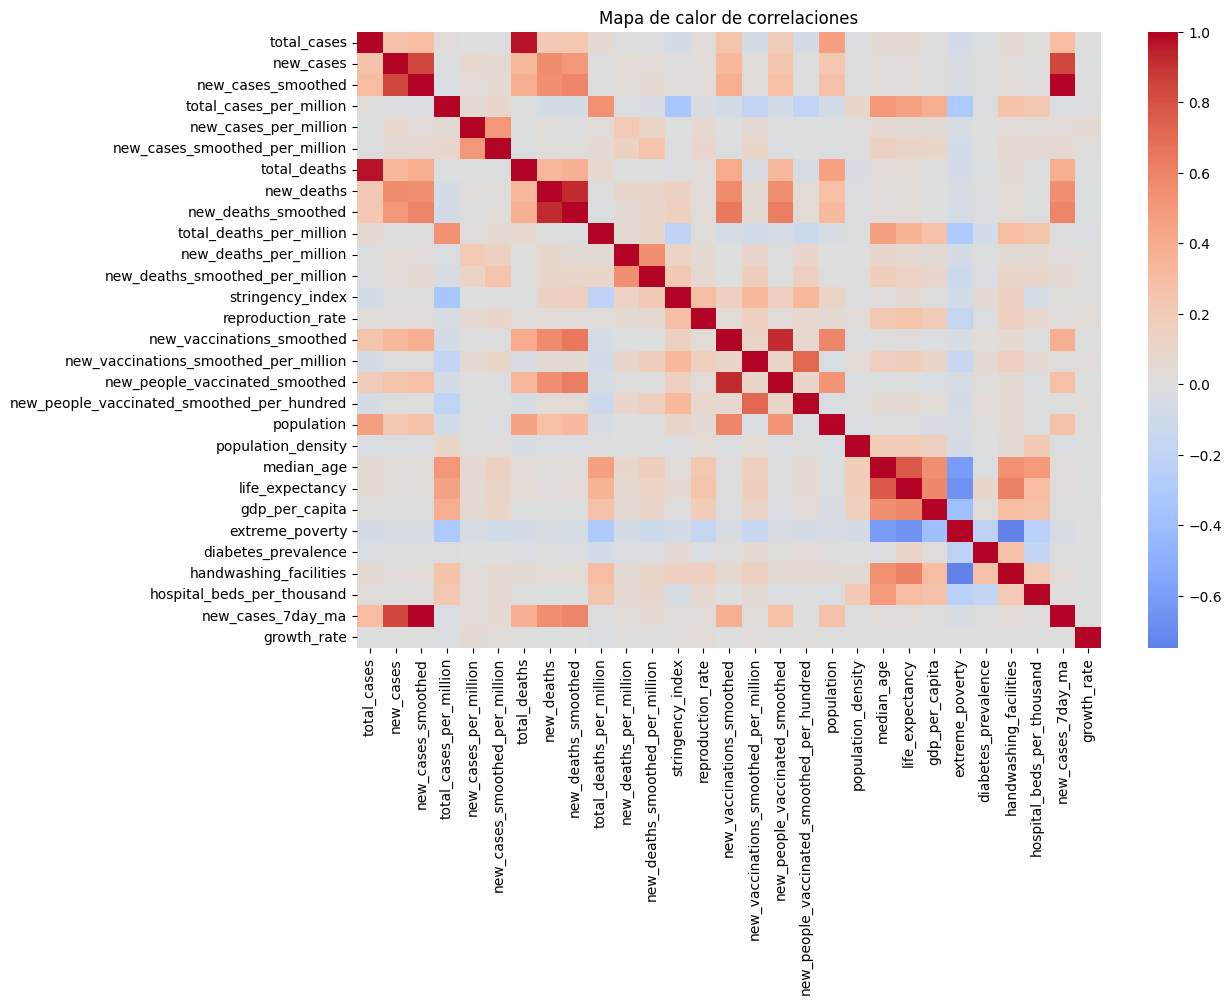

In [19]:
#graficar matriz
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Mapa de calor de correlaciones")
plt.show()


In [21]:
# Seleccionar solo las columnas de interés
cols_salud_demo = [
    "population", "population_density", "median_age", "hospital_beds_per_thousand",
    "life_expectancy", "total_cases", "total_deaths", "diabetes_prevalence", "gdp_per_capita"
]

df_filtered = df_reduced[cols_salud_demo].copy()
df_filtered.head()


,population,population_density,median_age,hospital_beds_per_thousand,life_expectancy,total_cases,total_deaths,diabetes_prevalence,gdp_per_capita
0,40578801.0,62.215477,16.752001,0.39,65.616997,0.0,0.0,10.9,1516.273315
1,40578801.0,62.215477,16.752001,0.39,65.616997,0.0,0.0,10.9,1516.273315
2,40578801.0,62.215477,16.752001,0.39,65.616997,0.0,0.0,10.9,1516.273315
3,40578801.0,62.215477,16.752001,0.39,65.616997,0.0,0.0,10.9,1516.273315
4,40578801.0,62.215477,16.752001,0.39,65.616997,0.0,0.0,10.9,1516.273315


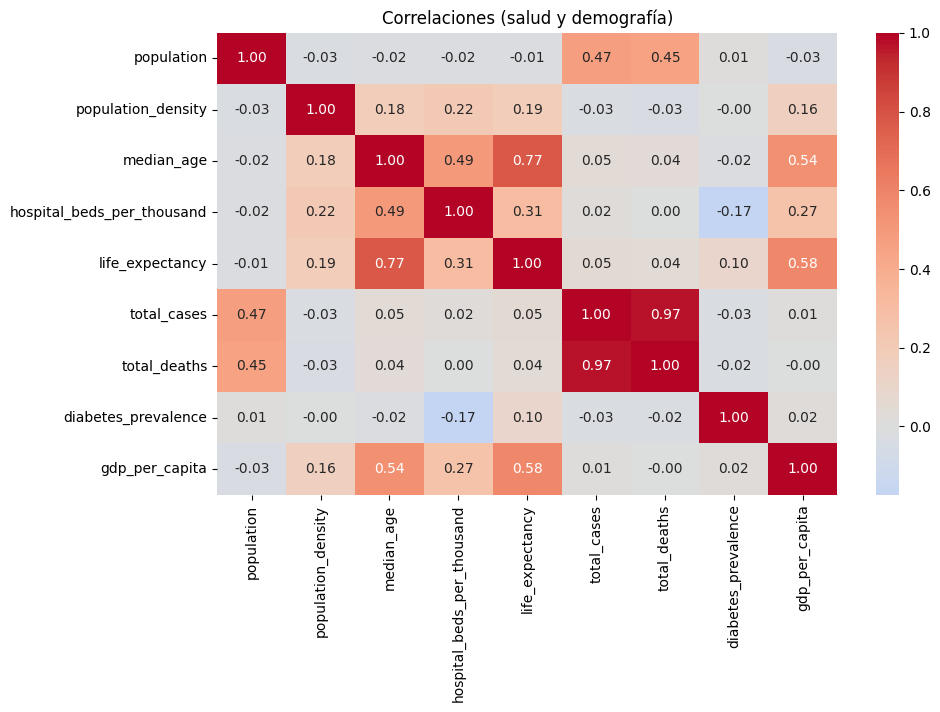

In [22]:
corr_matrix = df_filtered.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Correlaciones (salud y demografía)")
plt.show()


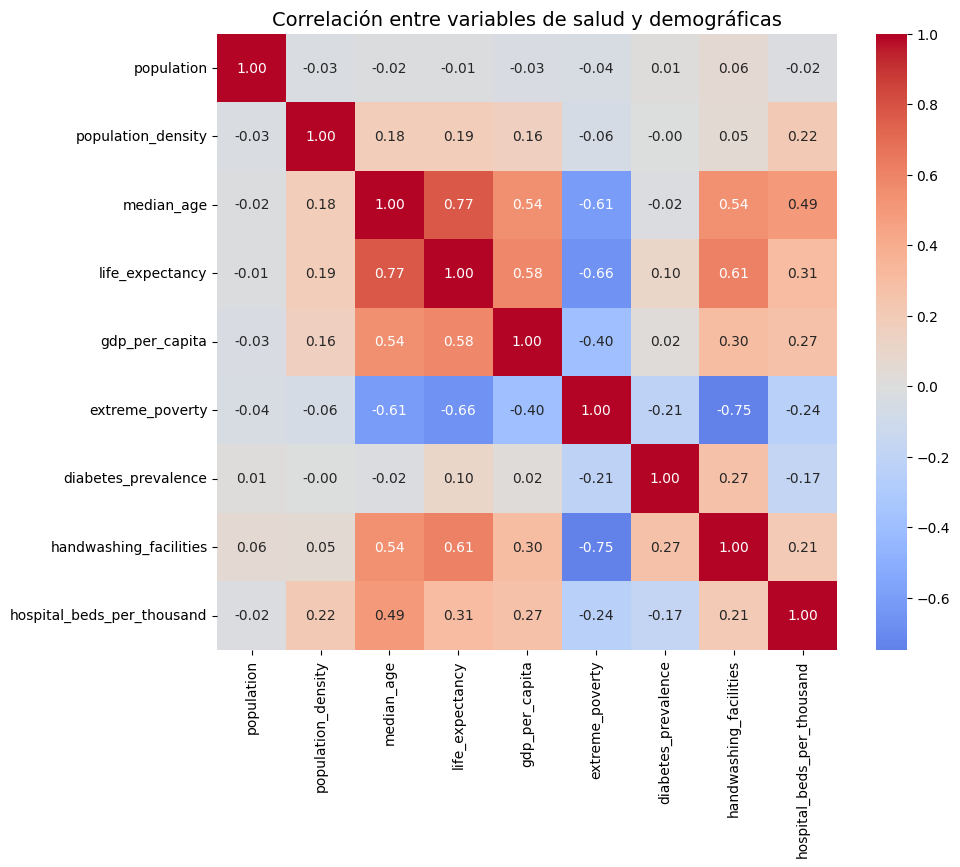

Pares de variables altamente correlacionadas (>0.85):


In [25]:
# Seleccionar solo columnas demográficas y de salud
cols_dem_salud = [
    'population', 'population_density', 'median_age', 'life_expectancy',
    'gdp_per_capita', 'extreme_poverty', 'diabetes_prevalence',
    'handwashing_facilities', 'hospital_beds_per_thousand'
]

# Subset del dataframe
df_salud = df[cols_dem_salud]

# Calcular matriz de correlación
corr = df_salud.corr()

# Graficar
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlación entre variables de salud y demográficas", fontsize=14)
plt.show()

# Opcional: imprimir pares con alta correlación
threshold = 0.85
high_corr = [(i,j,corr.loc[i,j]) for i in corr.columns for j in corr.columns
             if i != j and abs(corr.loc[i,j]) > threshold]

print("Pares de variables altamente correlacionadas (>0.85):")
for i,j,c in high_corr:
    print(f"{i} - {j}: {c:.2f}")


In [27]:
# Eliminar la columna population
df_salud = df_salud.drop(columns=["population"])

In [28]:
#de las 61 variables originales, voy a continuar mi analisis con estas 8 variables

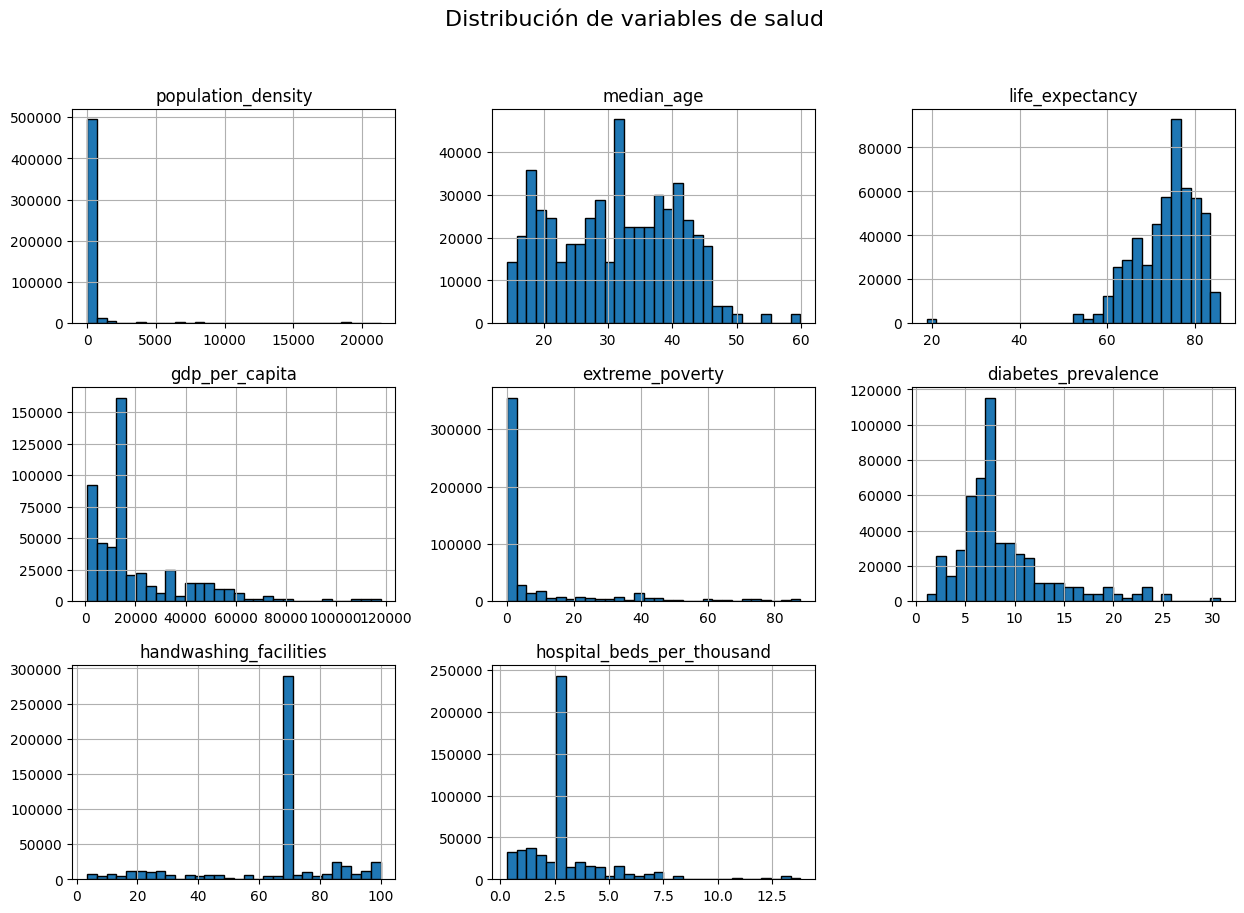

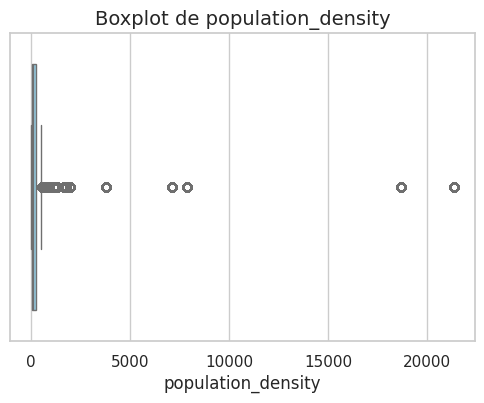

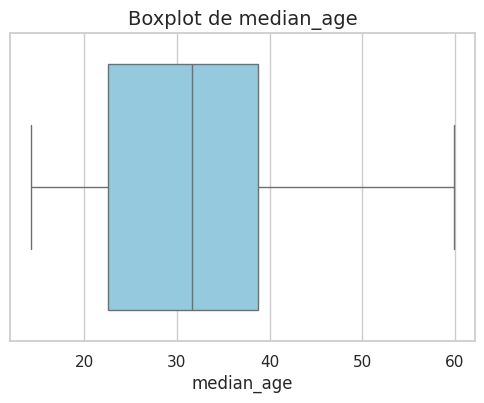

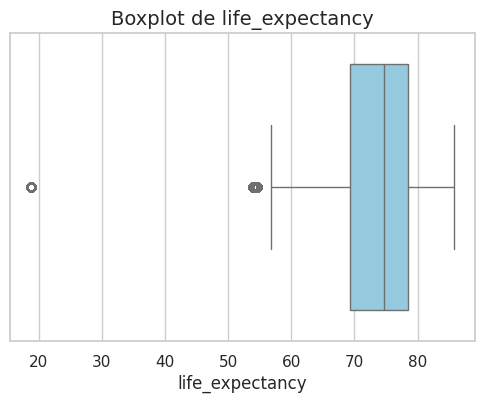

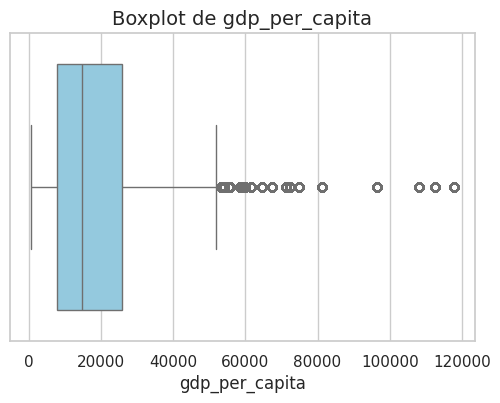

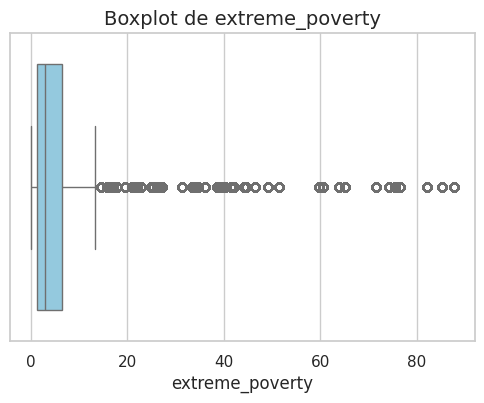

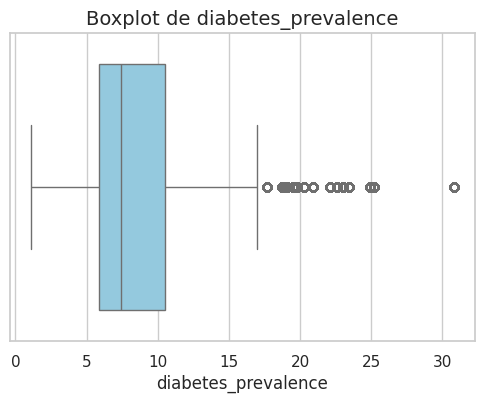

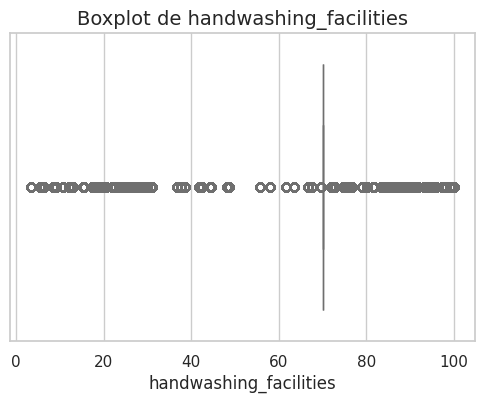

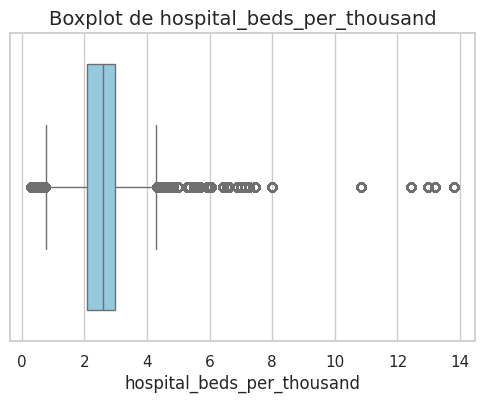

In [30]:
# Histogramas
df_salud.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Distribución de variables de salud", fontsize=16)
plt.show()

# Boxplots
# Configuración general de estilo
sns.set(style="whitegrid")

# Iterar sobre las columnas y graficar un boxplot por cada variable
for col in df_salud.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_salud[col], color="skyblue")
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.xlabel(col)
    plt.show()


In [36]:
#hay un punto raro en el boxplot de life_expectancy lo voy a identificar
#df[df["life_expectancy"] < 40] #identifico un pais con life expectancy de 18.8 Central African Republic


In [34]:
#el pais con life_expectancy 18.8 es Central African Republic, pero segun datos confirables alrededor de 57
#voy a cambiar ese valor en en el DF original

# dentificar el índice del país en el df original
idx_car = df[df['country'] == 'Central African Republic'].index
print(idx_car)  # Esto te dice el índice o índices

# Asignar la esperanza de vida correcta en df_salud
# Asumiendo que df_salud tiene el mismo orden que df original
df_salud.loc[idx_car, 'life_expectancy'] = 57

# Verificar que el cambio se aplicó
#df_salud.loc[idx_car, 'life_expectancy']


Index([85934, 85935, 85936, 85937, 85938, 85939, 85940, 85941, 85942, 85943,
       ...
       87966, 87967, 87968, 87969, 87970, 87971, 87972, 87973, 87974, 87975],
      dtype='int64', length=2042)


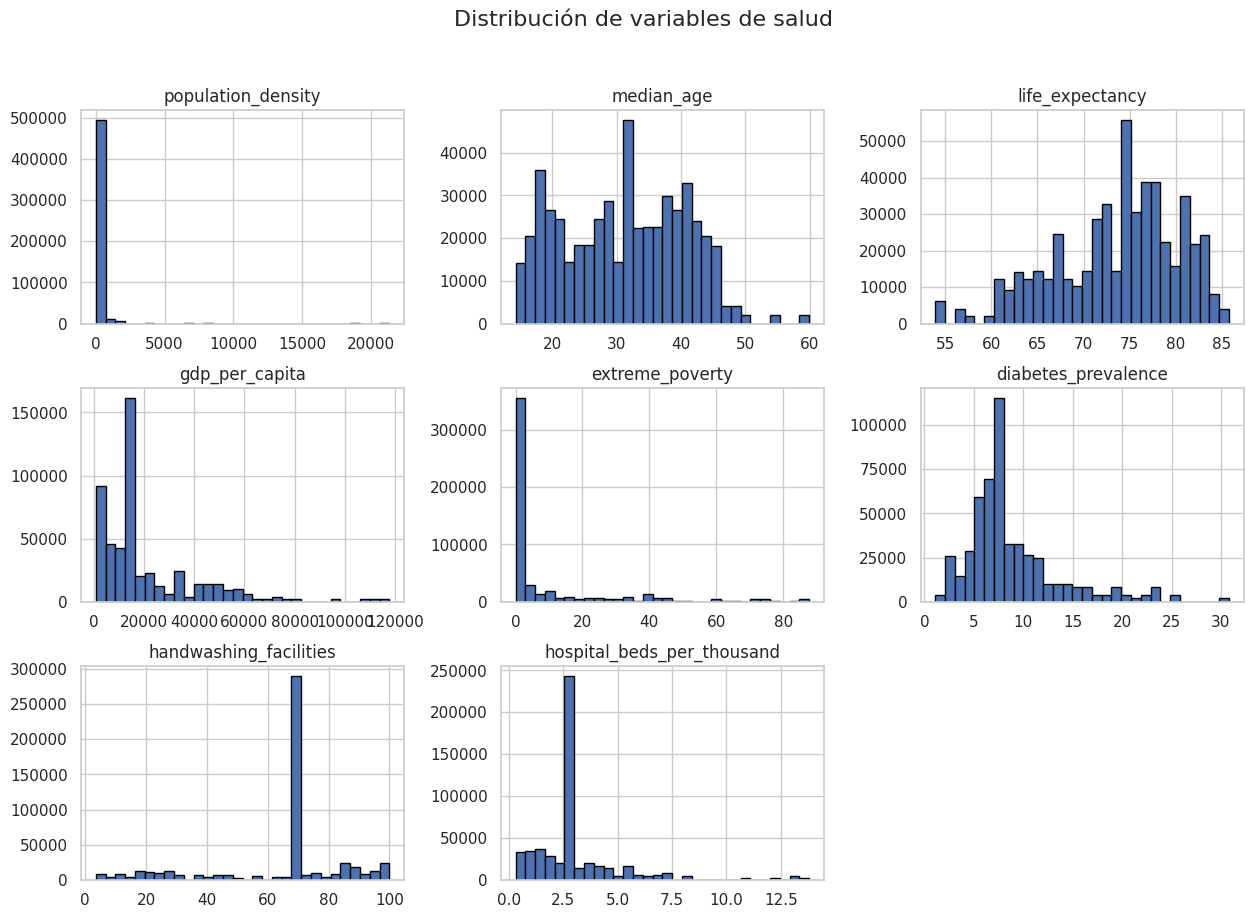

In [35]:
df_salud.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Distribución de variables de salud", fontsize=16)
plt.show()

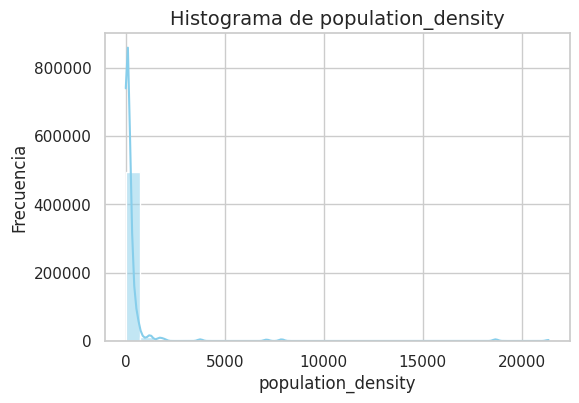

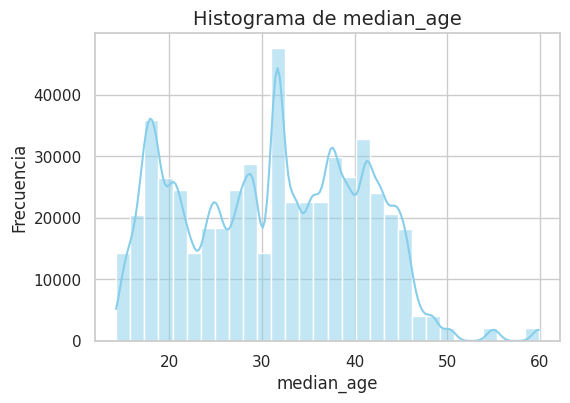

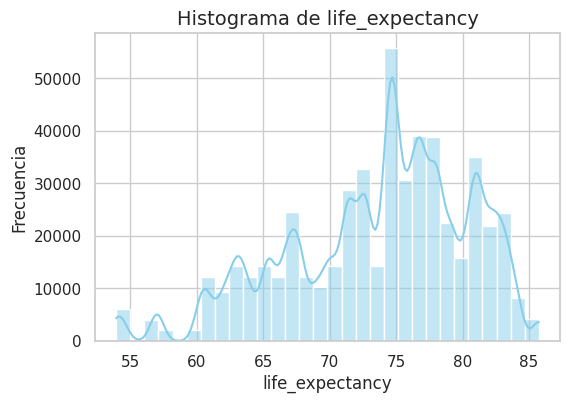

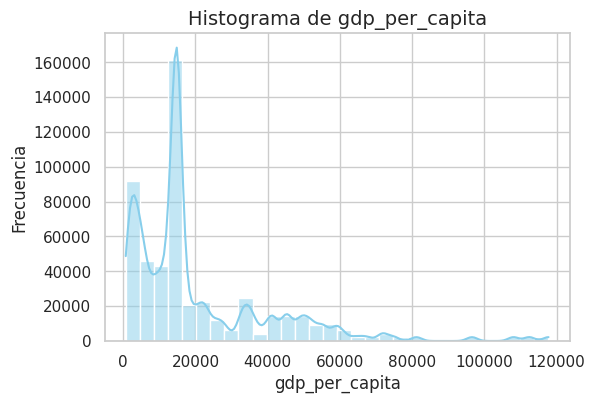

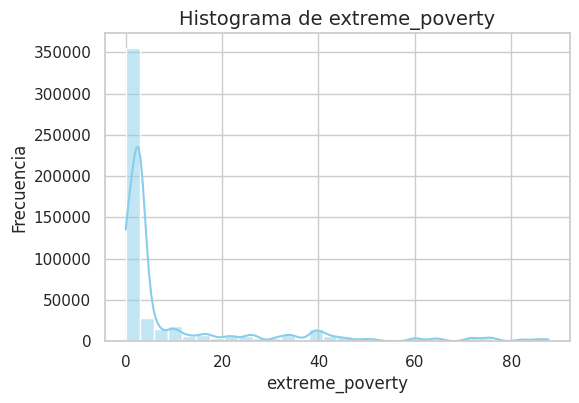

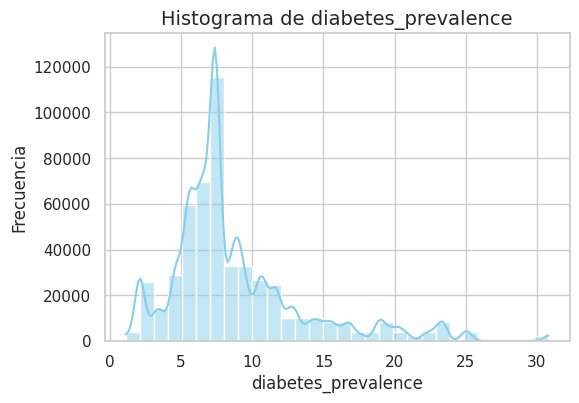

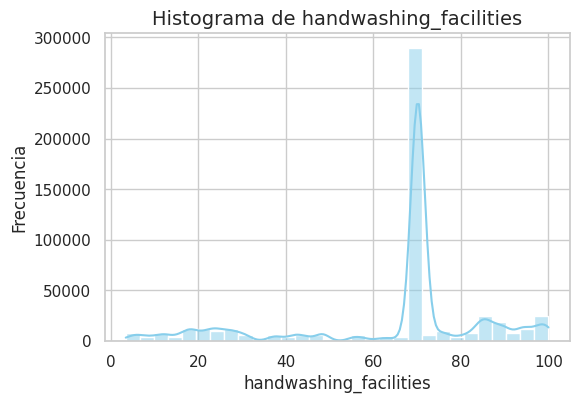

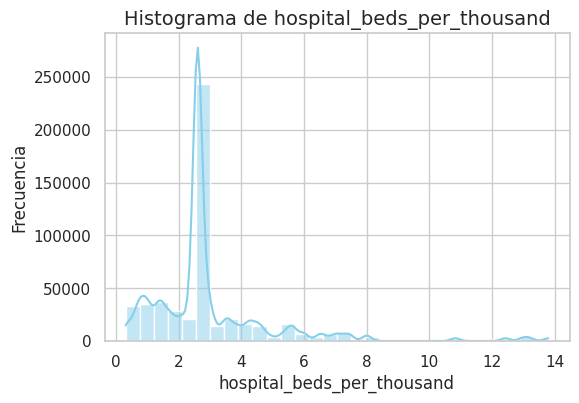

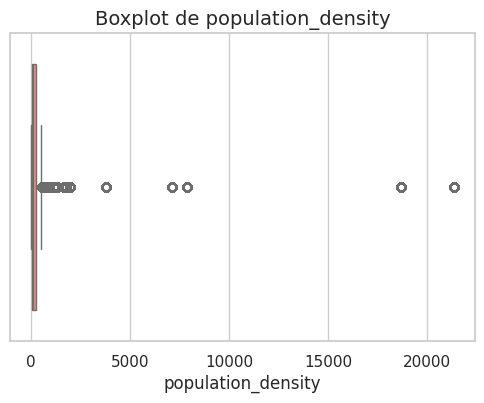

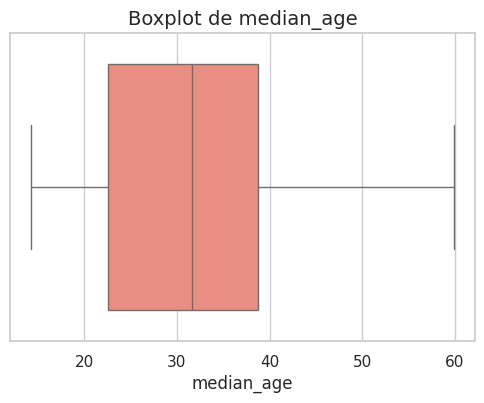

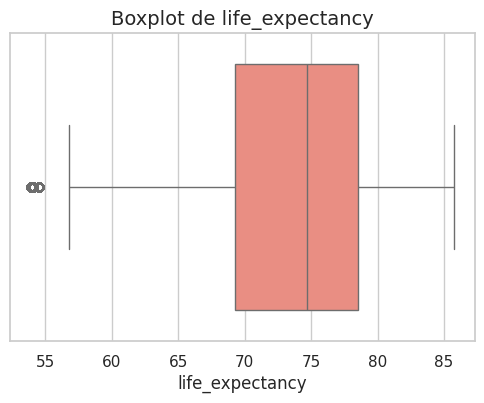

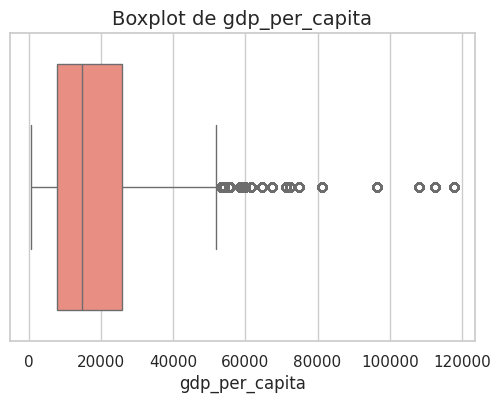

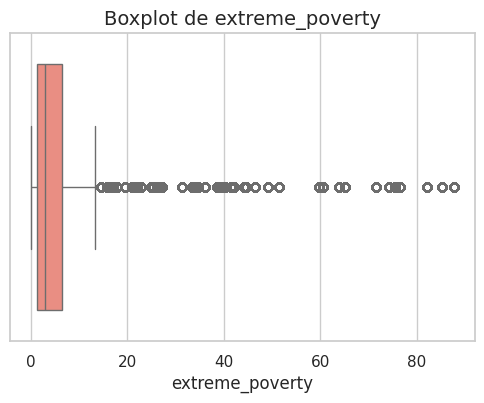

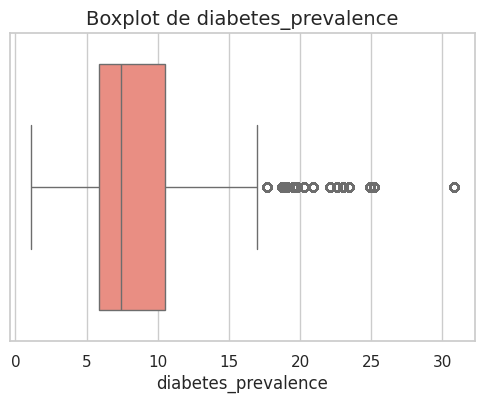

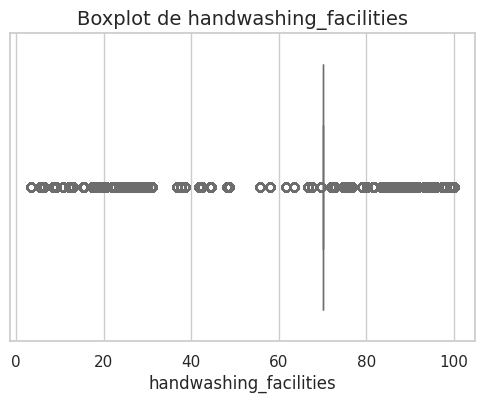

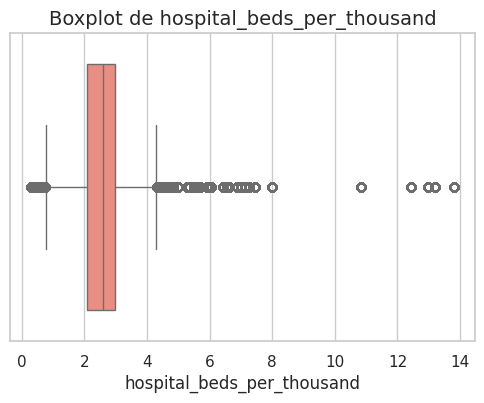

In [37]:

sns.set(style="whitegrid")

# Histogramas individuales
for col in df_salud.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_salud[col], kde=True, color="skyblue", bins=30)
    plt.title(f"Histograma de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Boxplots individuales
for col in df_salud.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_salud[col], color="salmon")
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.xlabel(col)
    plt.show()


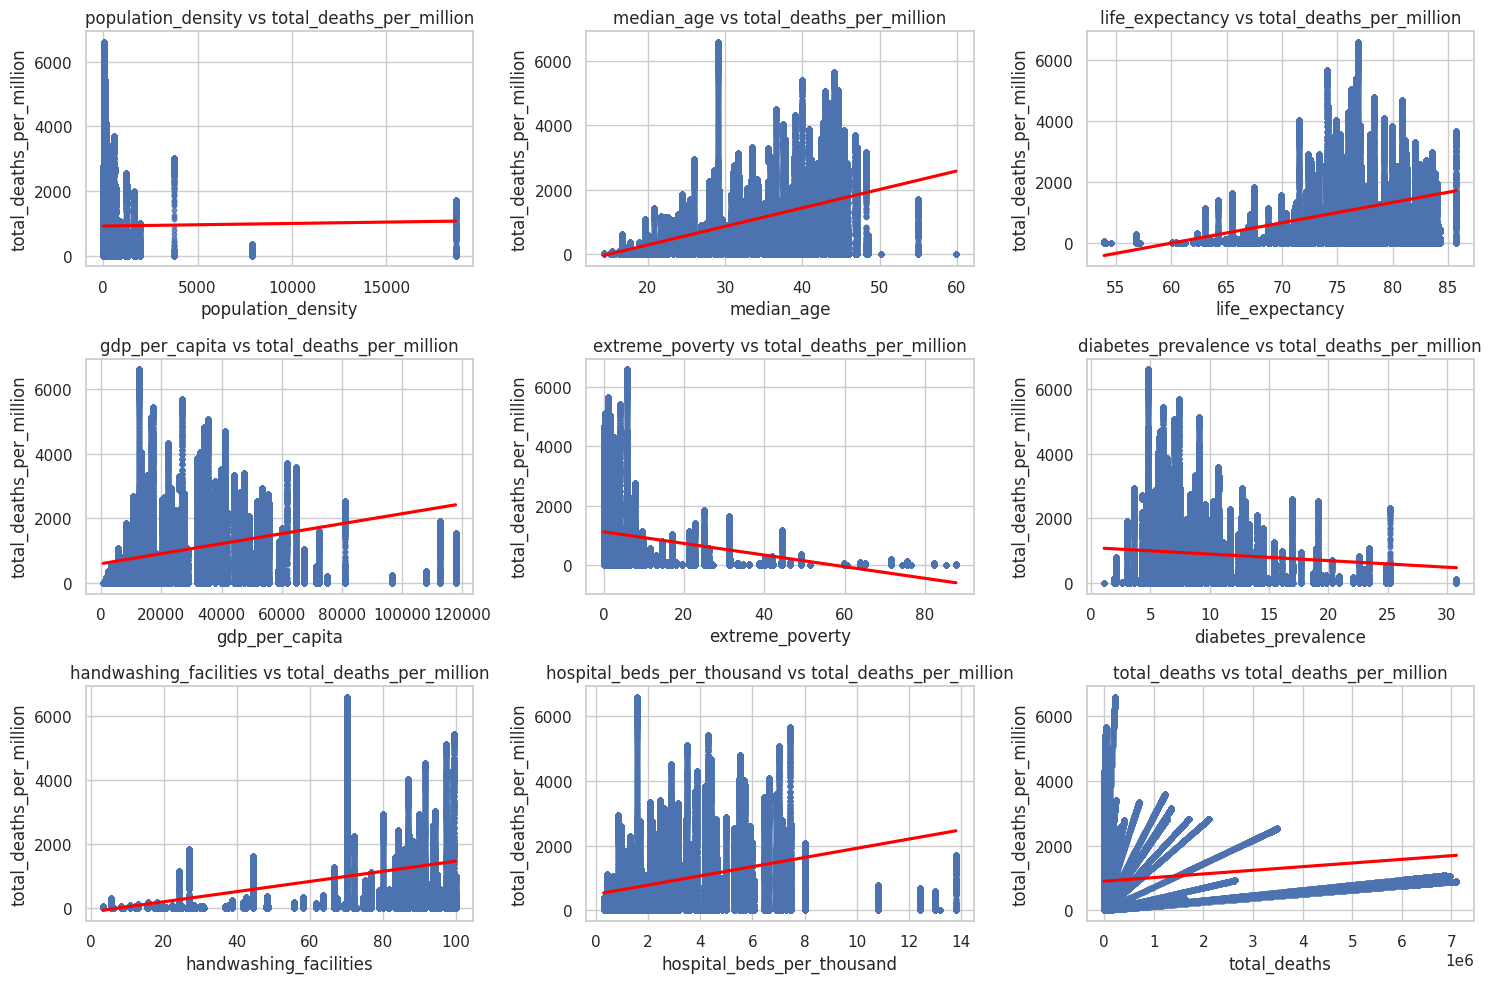

Correlación de cada variable con la variable objetivo:
total_deaths_per_million      1.000000
median_age                    0.465096
life_expectancy               0.384027
handwashing_facilities        0.299872
gdp_per_capita                0.265510
hospital_beds_per_thousand    0.246453
total_deaths                  0.073886
population_density            0.009182
diabetes_prevalence          -0.084161
extreme_poverty              -0.302953
Name: total_deaths_per_million, dtype: float64


In [43]:
# agregar total deaths
df_salud['total_deaths_per_million'] = df['total_deaths_per_million']

# Definir variable objetivo
target = 'total_deaths_per_million'

# Scatterplots individuales con regresión lineal
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(df_salud.columns):
    if col != target:
        plt.subplot(3,3,i+1)
        sns.regplot(x=df_salud[col], y=df_salud[target], scatter_kws={'s':10}, line_kws={'color':'red'})
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
corr_target = df_salud.corr()[target].sort_values(ascending=False)
print("Correlación de cada variable con la variable objetivo:")
print(corr_target)



In [46]:
#vamos con el modelo predictivo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar solo filas con objetivo disponible
df_model = df_salud.dropna(subset=["total_deaths_per_million"])

X = df_model.drop(columns=["total_deaths_per_million"])
y = df_model["total_deaths_per_million"]


# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones sobre el set de test
y_pred = rf.predict(X_test)

# MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 43.99
R²: 1.00


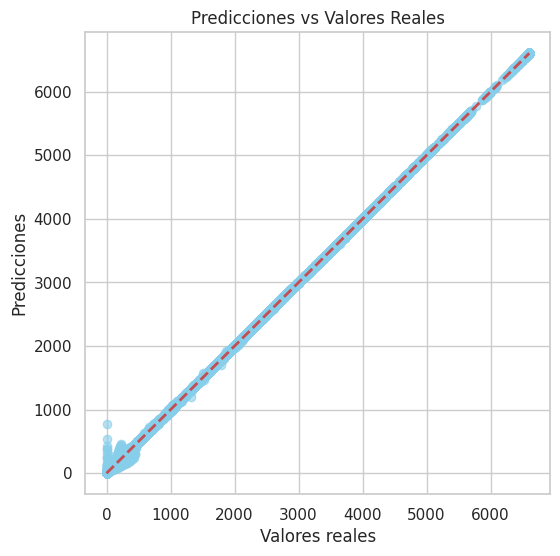

In [49]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()


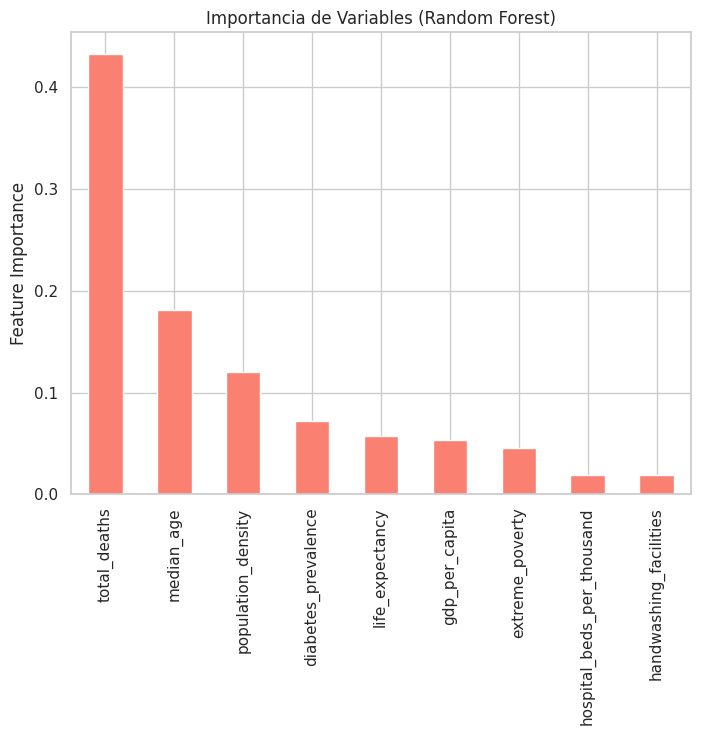

In [50]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_importances.plot(kind='bar', color='salmon')
plt.title("Importancia de Variables (Random Forest)")
plt.ylabel("Feature Importance")
plt.show()


In [51]:
#vamos ahora con regresion
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))


Linear Regression R²: 0.23781387862629055


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting R²:", r2_score(y_test, y_pred_gbr))


Gradient Boosting R²: 0.9123657064176836


In [53]:
def plot_pred(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.6, color='skyblue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.title(title)
    plt.show()
    print(f"R²: {r2_score(y_true, y_pred):.2f} | MSE: {mean_squared_error(y_true, y_pred):.2f}")

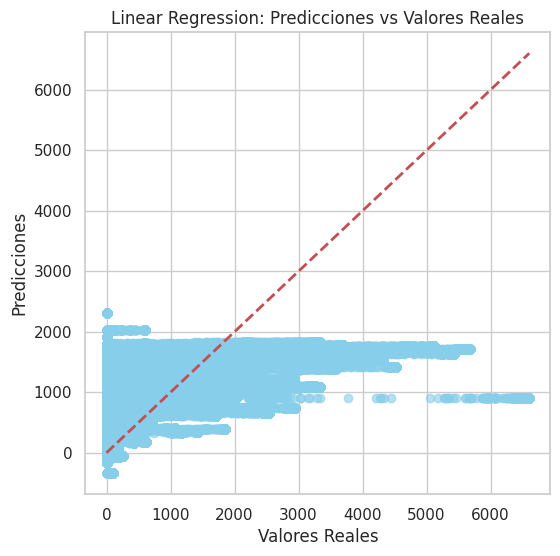

R²: 0.24 | MSE: 1053625.55


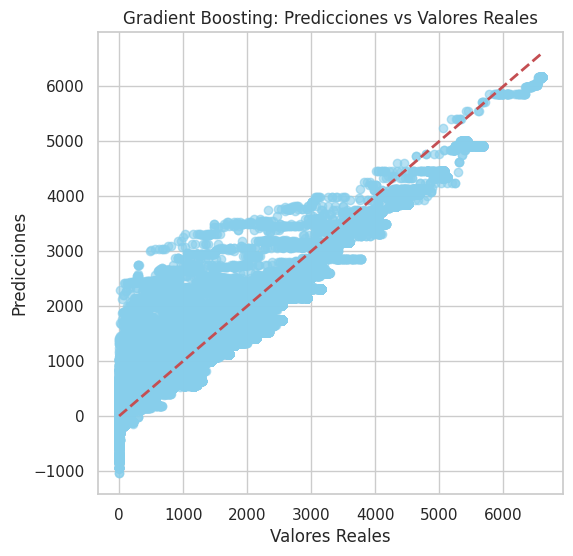

R²: 0.91 | MSE: 121143.29


In [54]:
plot_pred(y_test, y_pred_lr, "Linear Regression: Predicciones vs Valores Reales")
plot_pred(y_test, y_pred_gbr, "Gradient Boosting: Predicciones vs Valores Reales")

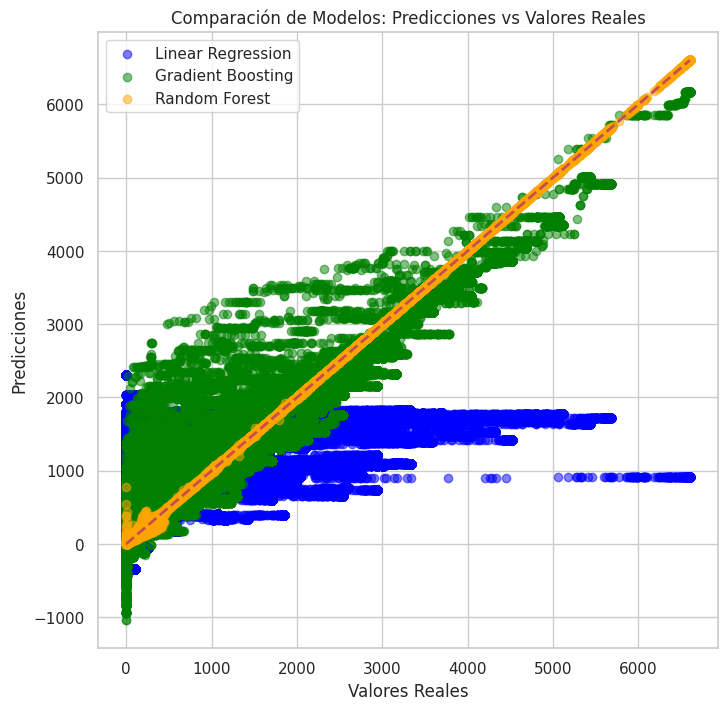

In [55]:
plt.figure(figsize=(8,8))

# Scatter de valores reales vs predicciones de cada modelo
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label='Gradient Boosting', color='green')
plt.scatter(y_test, y_pred, alpha=0.5, label='Random Forest', color='orange')  # tu RF ya entrenado

# Línea de ajuste perfecto
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Modelos: Predicciones vs Valores Reales")
plt.legend()
plt.show()
